In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
!pip install chart_studio

In [3]:
# Data and plotting imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

# Statistical Libraries
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



In [4]:
#
bill_amount = pd.read_csv('/gdrive/MyDrive/Dataset/Healthcare Data Challenge Data/bill_amount.csv')
bill_id = pd.read_csv('/gdrive/MyDrive/Dataset/Healthcare Data Challenge Data/bill_id.csv')
bill_id_amount = pd.merge(bill_id, bill_amount, on='bill_id')
bill_id_amount['date_of_admission'] = pd.to_datetime(bill_id_amount['date_of_admission'], format="%Y/%m/%d")
bill_id_amount['month_year'] = bill_id_amount['date_of_admission'].dt.to_period('M')
bill_id_amount['date_of_admission'] = bill_id_amount['date_of_admission'].astype(str)
bill_id_amount.head()

,bill_id,patient_id,date_of_admission,amount,month_year
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467,2011-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,19900.297086,2011-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972,2011-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,1145.372193,2011-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902,2011-01


In [5]:
bill_id_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   bill_id            13600 non-null  int64    
 1   patient_id         13600 non-null  object   
 2   date_of_admission  13600 non-null  object   
 3   amount             13600 non-null  float64  
 4   month_year         13600 non-null  period[M]
dtypes: float64(1), int64(1), object(2), period[M](1)
memory usage: 637.5+ KB


In [6]:
bill_id_amount.head()

,bill_id,patient_id,date_of_admission,amount,month_year
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467,2011-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,19900.297086,2011-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972,2011-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,1145.372193,2011-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902,2011-01


In [7]:
clinical_data = pd.read_csv('/gdrive/MyDrive/Dataset/Healthcare Data Challenge Data/clinical_data.csv')
clinical_data.rename(columns= {'id': 'patient_id'}, inplace= True)
clinical_data.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [8]:
clinical_data.describe()

,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
count,3400.000000,3167.000000,3400.000000,3096.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,0.169118,0.311336,0.052059,0.063953,0.254706,0.254412,0.503824,0.591176,0.820882,0.523235,0.819706,0.744118,0.619706,0.662353,0.544706,0.726471,0.526765,14.469882,27.431529,99.489706,78.748441,165.084412
std,0.374911,0.463113,0.222178,0.244710,0.435760,0.435594,0.500059,0.491689,0.383507,0.499533,0.384489,0.436420,0.485530,0.472977,0.498071,0.445836,0.499357,1.747323,2.463844,15.254453,10.975076,6.973678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,52.000000,48.000000,151.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.800000,88.000000,71.200000,160.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.500000,27.400000,100.000000,78.900000,165.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.800000,29.100000,110.000000,86.300000,170.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,121.000000,186.000000


In [9]:
print(clinical_data.apply(lambda col: col.unique()))

patient_id            [1d21f2be18683991eb93d182d6b2d220, 62bdca0b95d...
date_of_admission     [2011-01-01, 2011-01-02, 2011-01-08, 2011-01-0...
date_of_discharge     [2011-01-11, 2011-01-13, 2011-01-14, 2011-01-1...
medical_history_1                                                [0, 1]
medical_history_2                                       [1.0, 0.0, nan]
medical_history_3                                       [0, No, 1, Yes]
medical_history_4                                                [0, 1]
medical_history_5                                       [0.0, nan, 1.0]
medical_history_6                                                [0, 1]
medical_history_7                                                [0, 1]
preop_medication_1                                               [1, 0]
preop_medication_2                                               [0, 1]
preop_medication_3                                               [1, 0]
preop_medication_4                                              

In [10]:
clinical_data['medical_history_3']= clinical_data['medical_history_3'].apply(lambda x: '0' if 'No' in x else x)
clinical_data['medical_history_3']= clinical_data['medical_history_3'].apply(lambda x: '1' if 'Yes' in x else x)
clinical_data['medical_history_3'] = clinical_data['medical_history_3'].astype(str).astype(int)
clinical_data.medical_history_2.fillna(value=clinical_data.medical_history_1, inplace= True)
clinical_data.medical_history_5.fillna(value=clinical_data.medical_history_4, inplace= True)
clinical_data['date_of_admission'] = pd.to_datetime(clinical_data['date_of_admission'], format="%Y/%m/%d")
clinical_data['date_of_discharge'] = pd.to_datetime(clinical_data['date_of_discharge'], format="%Y/%m/%d")
clinical_data['no_of_days_admitted'] = clinical_data['date_of_discharge'] - clinical_data['date_of_admission']
clinical_data['Duration_of_admission'] = clinical_data['no_of_days_admitted'].dt.days.astype('int64')
clinical_data.drop(['no_of_days_admitted'], axis='columns', inplace= True)
clinical_data['date_of_admission'] = clinical_data['date_of_admission'].astype(str)
clinical_data['com'] = clinical_data['patient_id'].str.cat(clinical_data['date_of_admission'], sep=" ")
clinical_data.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,Duration_of_admission,com
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,10,1d21f2be18683991eb93d182d6b2d220 2011-01-01
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0,10,62bdca0b95d97e99e1c712048fb9fd09 2011-01-01
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0,11,c85cf97bc6307ded0dd4fef8bad2fa09 2011-01-02
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,0,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0,12,e0397dd72caf4552c5babebd3d61736c 2011-01-02
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,0,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0,8,94ade3cd5f66f4584902554dff170a29 2011-01-08


In [11]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   patient_id             3400 non-null   object        
 1   date_of_admission      3400 non-null   object        
 2   date_of_discharge      3400 non-null   datetime64[ns]
 3   medical_history_1      3400 non-null   int64         
 4   medical_history_2      3400 non-null   float64       
 5   medical_history_3      3400 non-null   int64         
 6   medical_history_4      3400 non-null   int64         
 7   medical_history_5      3400 non-null   float64       
 8   medical_history_6      3400 non-null   int64         
 9   medical_history_7      3400 non-null   int64         
 10  preop_medication_1     3400 non-null   int64         
 11  preop_medication_2     3400 non-null   int64         
 12  preop_medication_3     3400 non-null   int64         
 13  pre

In [12]:
print(clinical_data.apply(lambda col: col.unique()))

patient_id               [1d21f2be18683991eb93d182d6b2d220, 62bdca0b95d...
date_of_admission        [2011-01-01, 2011-01-02, 2011-01-08, 2011-01-0...
date_of_discharge        [2011-01-11T00:00:00.000000000, 2011-01-13T00:...
medical_history_1                                                   [0, 1]
medical_history_2                                               [1.0, 0.0]
medical_history_3                                                   [0, 1]
medical_history_4                                                   [0, 1]
medical_history_5                                               [0.0, 1.0]
medical_history_6                                                   [0, 1]
medical_history_7                                                   [0, 1]
preop_medication_1                                                  [1, 0]
preop_medication_2                                                  [0, 1]
preop_medication_3                                                  [1, 0]
preop_medication_4       

In [13]:
demographics = pd.read_csv('/gdrive/MyDrive/Dataset/Healthcare Data Challenge Data/demographics.csv')
now = pd.to_datetime('now')
demographics['date_of_birth'] = pd.to_datetime(demographics['date_of_birth'], errors='coerce')
demographics['age'] = (now.year - demographics['date_of_birth'].dt.year) - ((now.month - demographics['date_of_birth'].dt.month) < 0)
demographics.head()

,patient_id,gender,race,resident_status,date_of_birth,age
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,50
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18,45
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03,38
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15,73
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12,50


In [14]:
print(demographics.apply(lambda col: col.unique()))

patient_id         [fa2d818b2261e44e30628ad1ac9cc72c, 5b6477c5de7...
gender                                          [Female, f, Male, m]
race                [Indian, Chinese, Malay, chinese, India, Others]
resident_status      [Singaporean, Singapore citizen, PR, Foreigner]
date_of_birth      [1971-05-14T00:00:00.000000000, 1976-02-18T00:...
age                [50, 45, 38, 73, 54, 47, 52, 44, 79, 46, 56, 6...
dtype: object


In [15]:
demographics['gender'] = demographics['gender'].replace(['f','m'],['Female','Male'])
demographics['resident_status'] = demographics['resident_status'].replace(['Singaporean'],['Singapore citizen'])
demographics.head()

,patient_id,gender,race,resident_status,date_of_birth,age
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singapore citizen,1971-05-14,50
1,5b6477c5de78d0b138e3b0c18e21d0ae,Female,Chinese,Singapore citizen,1976-02-18,45
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03,38
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15,73
4,541ad077cb4a0e64cc422673afe28aef,Male,Chinese,Singapore citizen,1970-12-12,50


In [16]:
bill_id_amount_demographics = pd.merge(bill_id_amount, demographics, on='patient_id')
bill_id_amount_demographics['com'] = bill_id_amount_demographics['patient_id'].str.cat(bill_id_amount_demographics['date_of_admission'], sep=" ")
bill_id_amount_demographics.head()

,bill_id,patient_id,date_of_admission,amount,month_year,gender,race,resident_status,date_of_birth,age,com
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467,2011-01,Male,Indian,Singapore citizen,1976-12-19,44,1d21f2be18683991eb93d182d6b2d220 2011-01-01
1,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972,2011-01,Male,Indian,Singapore citizen,1976-12-19,44,1d21f2be18683991eb93d182d6b2d220 2011-01-01
2,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902,2011-01,Male,Indian,Singapore citizen,1976-12-19,44,1d21f2be18683991eb93d182d6b2d220 2011-01-01
3,1692196063,1d21f2be18683991eb93d182d6b2d220,2011-01-01,982.332324,2011-01,Male,Indian,Singapore citizen,1976-12-19,44,1d21f2be18683991eb93d182d6b2d220 2011-01-01
4,6466235037,1d21f2be18683991eb93d182d6b2d220,2015-09-17,1498.125668,2015-09,Male,Indian,Singapore citizen,1976-12-19,44,1d21f2be18683991eb93d182d6b2d220 2015-09-17


In [17]:
dataframe = pd.merge(bill_id_amount_demographics, clinical_data, on='com')
dataframe.drop(['patient_id_y', 'date_of_admission_y','com'], axis='columns', inplace= True)
dataframe['date_of_admission_x'] = pd.to_datetime(dataframe['date_of_admission_x'], format="%Y/%m/%d")
dataframe.head()

,bill_id,patient_id_x,date_of_admission_x,amount,month_year,gender,race,resident_status,date_of_birth,age,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,Duration_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467,2011-01,Male,Indian,Singapore citizen,1976-12-19,44,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,10
1,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972,2011-01,Male,Indian,Singapore citizen,1976-12-19,44,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,10
2,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902,2011-01,Male,Indian,Singapore citizen,1976-12-19,44,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,10
3,1692196063,1d21f2be18683991eb93d182d6b2d220,2011-01-01,982.332324,2011-01,Male,Indian,Singapore citizen,1976-12-19,44,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,10
4,6466235037,1d21f2be18683991eb93d182d6b2d220,2015-09-17,1498.125668,2015-09,Male,Indian,Singapore citizen,1976-12-19,44,2015-09-30,0,0.0,0,0,0.0,0,1,1,1,1,0,1,0,0,1,0,1,1,16.4,23.7,108.0,72.3,161.0,13


In [18]:
#Checking the correlation with all the variables

In [19]:
dataframe.corr()['amount'].sort_values()

medical_history_4       -0.003078
lab_result_1            -0.002144
lab_result_2            -0.001821
lab_result_3             0.000030
preop_medication_5       0.000149
preop_medication_3       0.002579
bill_id                  0.002955
Duration_of_admission    0.002962
medical_history_3        0.003796
preop_medication_4       0.004998
preop_medication_1       0.005300
preop_medication_6       0.007107
height                   0.008571
medical_history_5        0.009462
preop_medication_2       0.010612
medical_history_7        0.012813
medical_history_2        0.014918
symptom_1                0.042208
symptom_4                0.042839
medical_history_6        0.046590
weight                   0.051811
symptom_2                0.051912
symptom_3                0.060520
medical_history_1        0.074510
age                      0.106825
symptom_5                0.169990
amount                   1.000000
Name: amount, dtype: float64

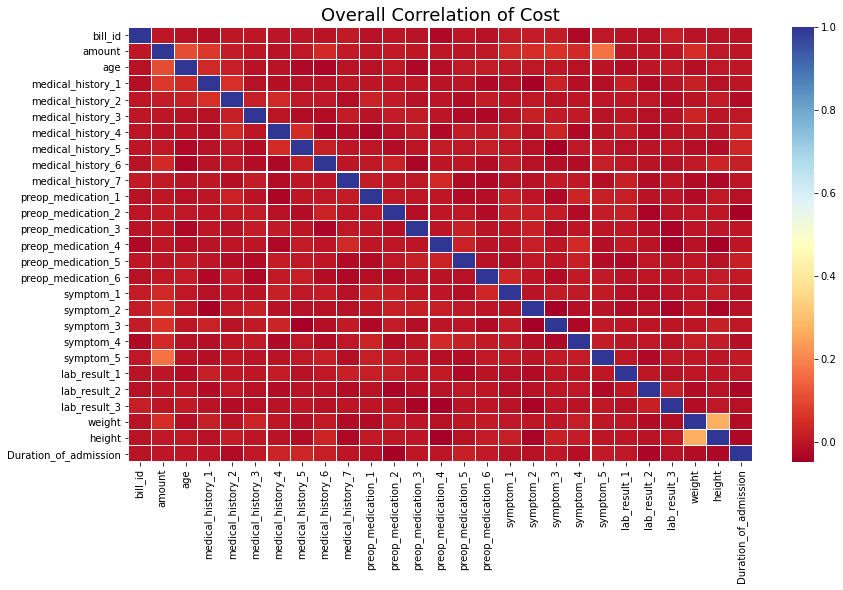

In [20]:
corr = dataframe.corr()
plt.figure(figsize=(14,8))
plt.title('Overall Correlation of Cost', fontsize=18)
sns.heatmap(corr,annot=False,cmap='RdYlBu',linewidths=0.2,annot_kws={'size':20})
plt.show()

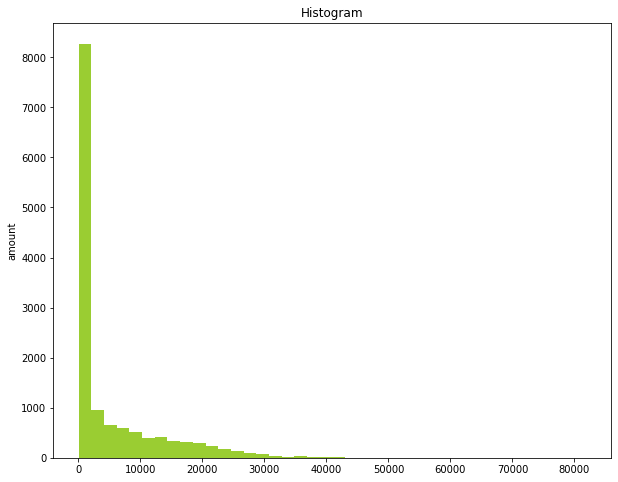

In [21]:
plt.figure(figsize=(10,8))
x = dataframe['amount']
plt.hist(x, bins = 40, color='yellowgreen')
plt.gca().set(title='Histogram', ylabel='amount')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



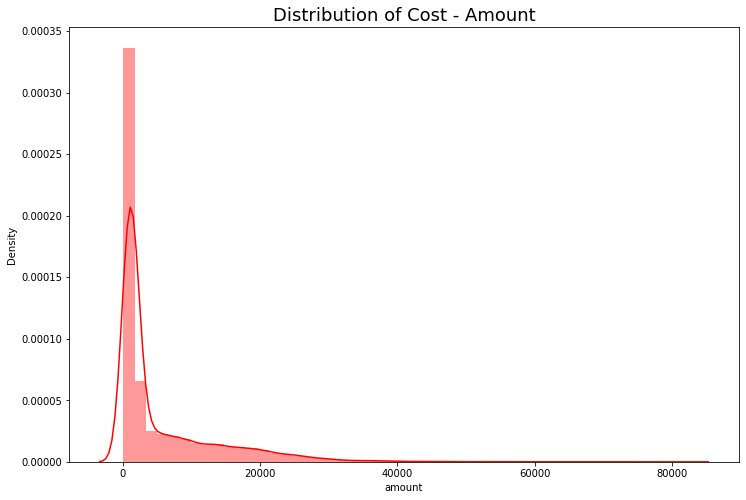

In [22]:
# Maybe we can try this with plotly.
plt.figure(figsize=(12,8))
sns.distplot(dataframe['amount'], color='r')
plt.title('Distribution of Cost - Amount', fontsize=18)

plt.show()

In [23]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   bill_id                13600 non-null  int64         
 1   patient_id_x           13600 non-null  object        
 2   date_of_admission_x    13600 non-null  datetime64[ns]
 3   amount                 13600 non-null  float64       
 4   month_year             13600 non-null  period[M]     
 5   gender                 13600 non-null  object        
 6   race                   13600 non-null  object        
 7   resident_status        13600 non-null  object        
 8   date_of_birth          13600 non-null  datetime64[ns]
 9   age                    13600 non-null  int64         
 10  date_of_discharge      13600 non-null  datetime64[ns]
 11  medical_history_1      13600 non-null  int64         
 12  medical_history_2      13600 non-null  float64       
 13  m

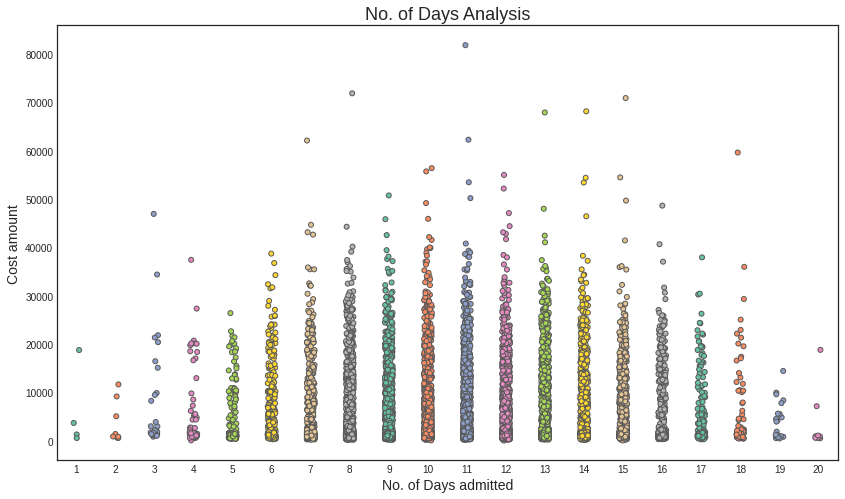

In [24]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-white')
sns.stripplot(x='Duration_of_admission', y='amount', data=dataframe, jitter=True, palette="Set2", linewidth=1)
plt.title('No. of Days Analysis', fontsize=18)
plt.xlabel('No. of Days admitted', fontsize=14)
plt.ylabel('Cost amount', rotation=90, fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



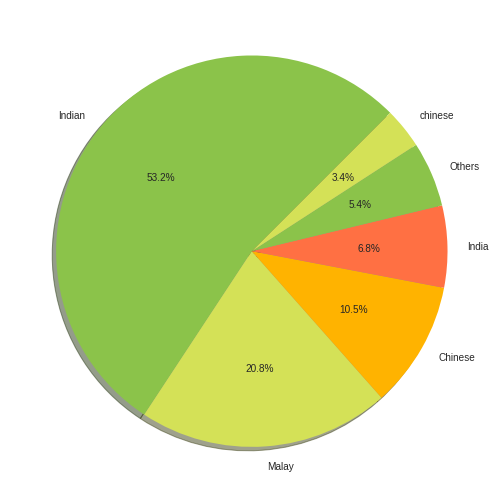

In [25]:

plt.figure(figsize=(9,9))
area = [dataframe['race'].value_counts()]
labels = ['Indian', 'Malay', 'Chinese', 'India', 'Others', 'chinese']
colors = ['#8BC34A','#D4E157','#FFB300','#FF7043']
plt.pie (area , labels= labels , colors= colors , startangle=45,autopct='%1.1f%%', shadow=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



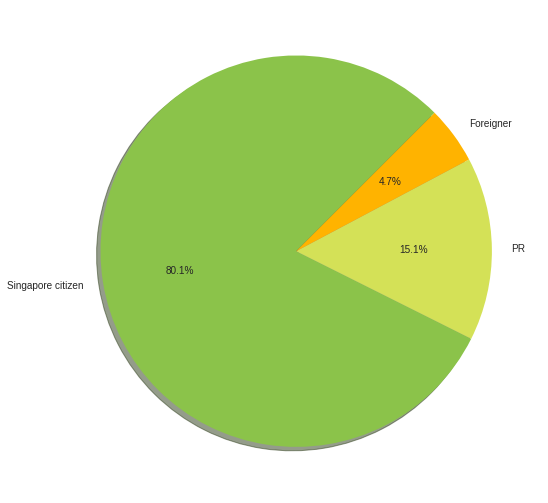

In [26]:
plt.figure(figsize=(9,9))
area = [dataframe['resident_status'].value_counts()]
labels = ['Singapore citizen' , 'PR' , 'Foreigner']
colors = ['#8BC34A','#D4E157','#FFB300','#FF7043']
plt.pie (area , labels= labels , colors= colors , startangle=45,autopct='%1.1f%%', shadow=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



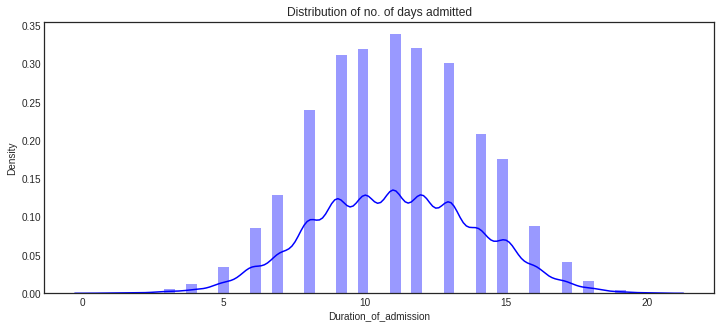

In [27]:

plt.figure(figsize=(12,5))
plt.title("Distribution of no. of days admitted")
ax = sns.distplot(dataframe ["Duration_of_admission"], color = 'b')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



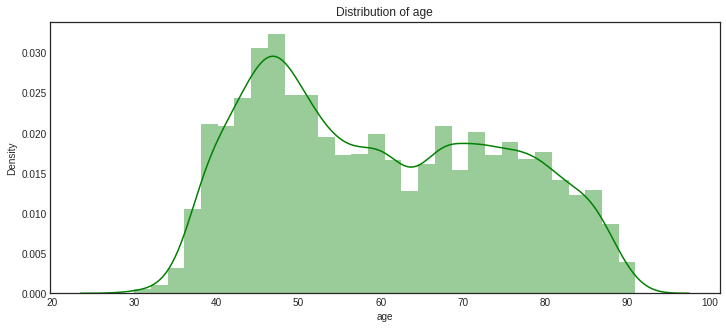

In [28]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(dataframe ["age"], color = 'g')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



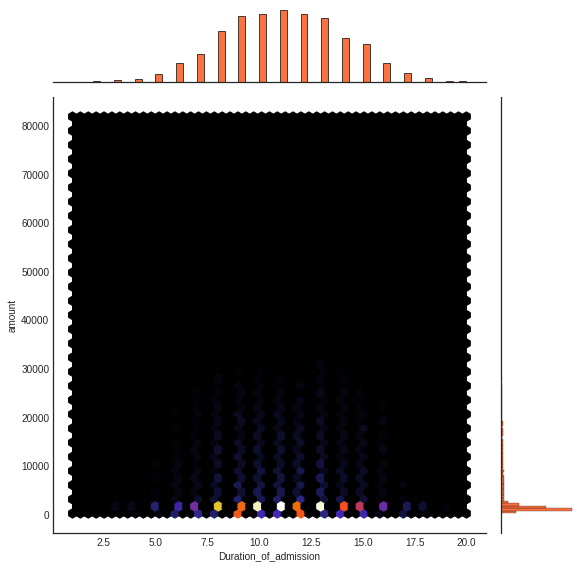

In [29]:
sns.jointplot(x='Duration_of_admission',y='amount',data=dataframe,
              kind='hex', cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

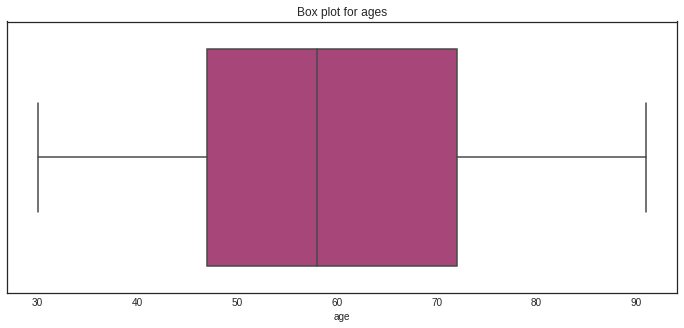

In [30]:

plt.figure(figsize=(12,5))
plt.title("Box plot for ages")
sns.boxplot(x="age", data=dataframe,orient="h", palette = 'magma')

Text(0.5, 1.0, 'Distribution of age and amount')

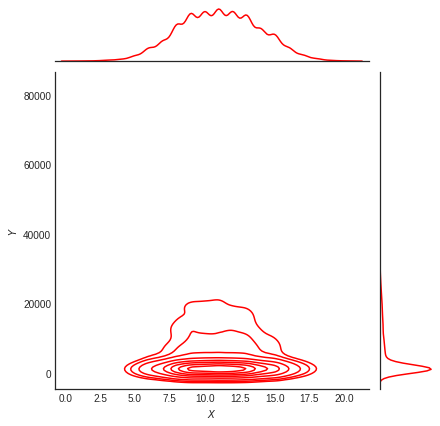

In [31]:
g = sns.jointplot(x="Duration_of_admission", y="amount", data = dataframe,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of age and amount')

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

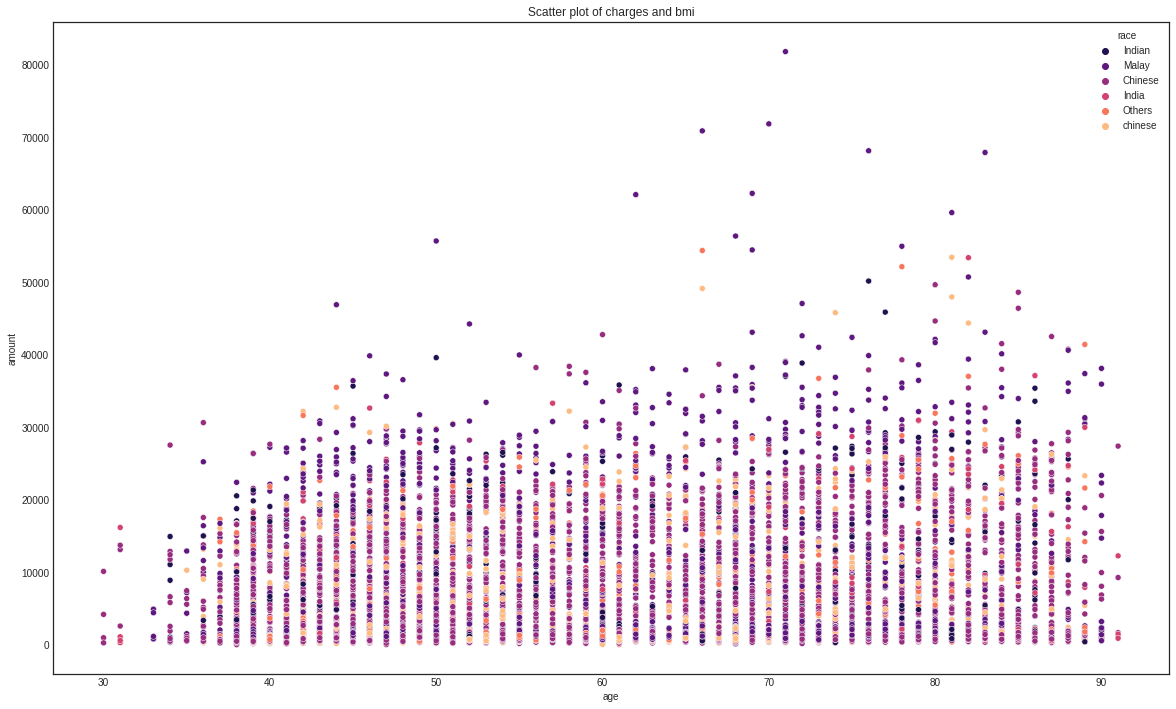

In [32]:
plt.figure(figsize=(20,12))
ax = sns.scatterplot(x='age',y='amount',data=dataframe,palette='magma',hue='race')
ax.set_title('Scatter plot of charges and bmi')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



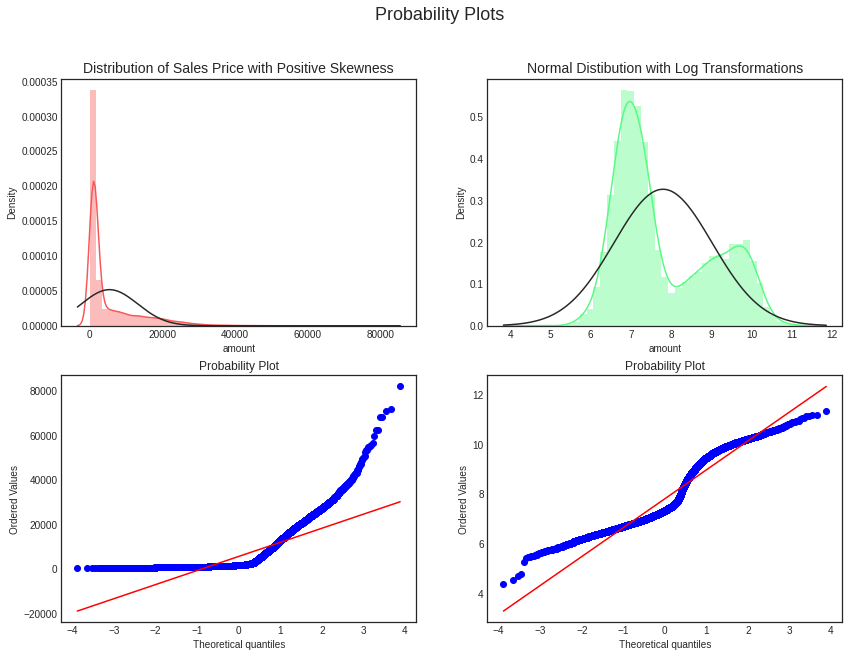

In [33]:
from scipy.stats import norm


# norm = a normal continous variable.

log_style = np.log(dataframe['amount'])  # log of salesprice

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(dataframe['amount'], color="#FA5858", ax=ax1, fit=norm)
ax1.set_title("Distribution of Sales Price with Positive Skewness", fontsize=14)
ax2 = sns.distplot(log_style, color="#58FA82",ax=ax2, fit=norm)
ax2.set_title("Normal Distibution with Log Transformations", fontsize=14)
ax3 = stats.probplot(dataframe['amount'], plot=ax3)
ax4 = stats.probplot(log_style, plot=ax4)

plt.show()